In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("car.xlsx")

In [3]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [4]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [5]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [6]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [7]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [8]:
Y = all_df['class'].values.astype('int64')

In [9]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1382

In [10]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units=18*9,input_dim=6,
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=18*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=18*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=18*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=18*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=18*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=18*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=18*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [21]:
model.add(Dense(units=18, 
                kernel_initializer='uniform', 
                activation='relu'))

In [22]:
model.add(Dense(units=4, 
                kernel_initializer='uniform',
                activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 162)               1134      
_________________________________________________________________
dense_2 (Dense)              (None, 144)               23472     
_________________________________________________________________
dense_3 (Dense)              (None, 126)               18270     
_________________________________________________________________
dense_4 (Dense)              (None, 108)               13716     
_________________________________________________________________
dense_5 (Dense)              (None, 90)                9810      
_________________________________________________________________
dense_6 (Dense)              (None, 72)                6552      
_________________________________________________________________
dense_7 (Dense)              (None, 54)                3942      
__________

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 1243 samples, validate on 139 samples
Epoch 1/30
 - 4s - loss: 1.3628 - acc: 0.6903 - val_loss: 1.3184 - val_acc: 0.6619
Epoch 2/30
 - 0s - loss: 1.0909 - acc: 0.6903 - val_loss: 0.9423 - val_acc: 0.6619
Epoch 3/30
 - 1s - loss: 0.8391 - acc: 0.6903 - val_loss: 0.7760 - val_acc: 0.6619
Epoch 4/30
 - 0s - loss: 0.5979 - acc: 0.6903 - val_loss: 0.5722 - val_acc: 0.6619
Epoch 5/30
 - 1s - loss: 0.4608 - acc: 0.6903 - val_loss: 0.4943 - val_acc: 0.6619
Epoch 6/30
 - 1s - loss: 0.4164 - acc: 0.7265 - val_loss: 0.4529 - val_acc: 0.6978
Epoch 7/30
 - 1s - loss: 0.3968 - acc: 0.7530 - val_loss: 0.4196 - val_acc: 0.7050
Epoch 8/30
 - 0s - loss: 0.3647 - acc: 0.7892 - val_loss: 0.3716 - val_acc: 0.7554
Epoch 9/30
 - 1s - loss: 0.3371 - acc: 0.8262 - val_loss: 0.3610 - val_acc: 0.7986
Epoch 10/30
 - 1s - loss: 0.3199 - acc: 0.8737 - val_loss: 0.3348 - val_acc: 0.8705
Epoch 11/30
 - 1s - loss: 0.2971 - acc: 0.8874 - val_loss: 0.4132 - val_acc: 0.8705
Epoch 12/30
 - 0s - loss: 0.2367 - acc

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

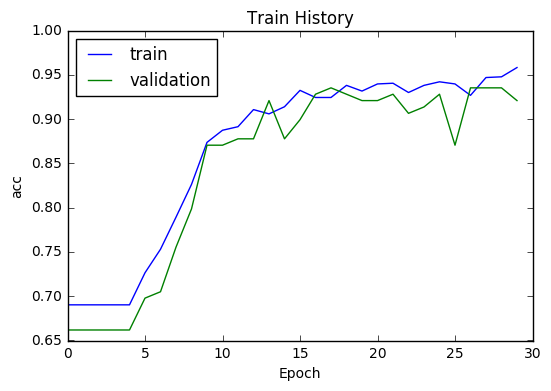

In [27]:
show_train_history(train_history,'acc','val_acc')

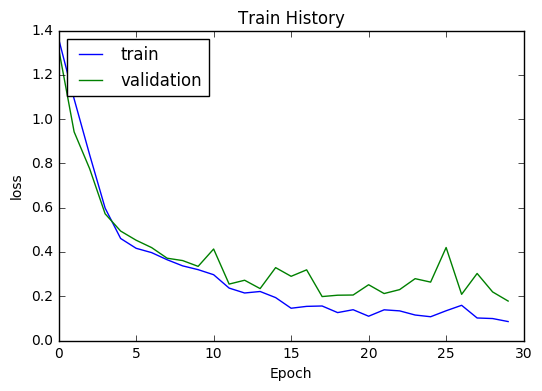

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

346/346 [==============================] - 0s 40us/step


In [30]:
scores[1]

0.9364161853156338